In [1]:
import pandas as pd
# Load data
df = pd.read_csv(r"C:\sachin\Python\Final_Code\score_p\anonymized_full_release_competition_dataset.csv") 

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_22096\4123669573.py:3: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\sachin\Python\Final_Code\score_p\anonymized_full_release_competition_dataset.csv")


In [2]:
df.head()

,studentId,MiddleSchoolId,InferredGender,SY ASSISTments Usage,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,...,RES_CONFUSED,RES_FRUSTRATED,RES_OFFTASK,RES_GAMING,Ln-1,Ln,MCAS,Enrolled,Selective,isSTEM
0,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.0,0.785585,0.000264,0.13,0.06119,45,0,0,NaN
1,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.887452,0.0,0.468252,0.001483,0.06119,0.21351,45,0,0,NaN
2,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.887452,0.0,0.468252,0.001483,0.116,0.033306,45,0,0,NaN
3,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.0,0.108417,0.010665,0.116,0.033306,45,0,0,NaN
4,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.0,0.108417,0.010665,0.033306,0.118386,45,0,0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942816 entries, 0 to 942815
Data columns (total 82 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   studentId                               942816 non-null  int64  
 1   MiddleSchoolId                          942816 non-null  int64  
 2   InferredGender                          769160 non-null  object 
 3   SY ASSISTments Usage                    942816 non-null  object 
 4   AveKnow                                 942816 non-null  float64
 5   AveCarelessness                         942816 non-null  float64
 6   AveCorrect                              942816 non-null  float64
 7   NumActions                              942816 non-null  int64  
 8   AveResBored                             942816 non-null  float64
 9   AveResEngcon                            942816 non-null  float64
 10  AveResConf                              9428

In [4]:
df.isnull().sum()

studentId                    0
MiddleSchoolId               0
InferredGender          173656
SY ASSISTments Usage         0
AveKnow                      0
                         ...  
Ln                           0
MCAS                         0
Enrolled                     0
Selective                    0
isSTEM                  625842
Length: 82, dtype: int64

### Check the missing values 

In [5]:
# Step 1: Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()

# Step 2: Drop the first two such columns
cols_to_drop = missing_cols[:2]  # only first two
df = df.drop(columns=cols_to_drop)

print(f"🗑️ Dropped columns with missing values: {cols_to_drop}")

🗑️ Dropped columns with missing values: ['InferredGender', 'sumTime3SDWhen3RowRight']


### Check the outlier

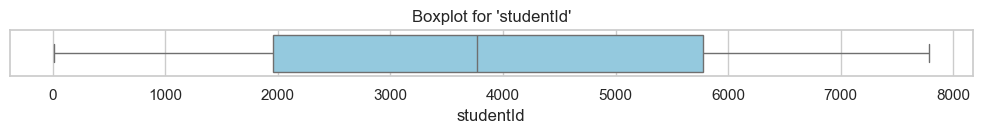

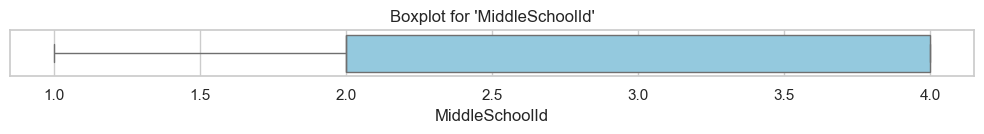

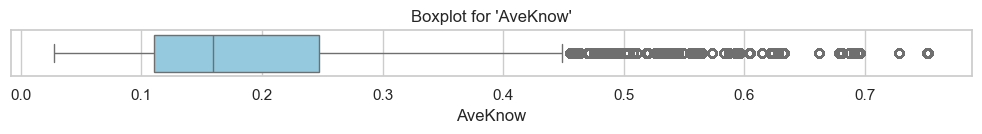

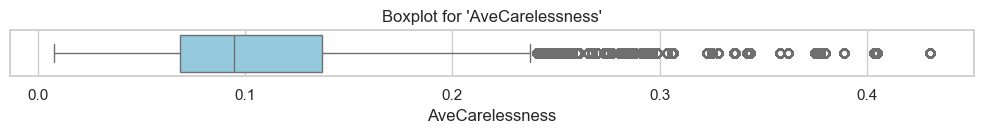

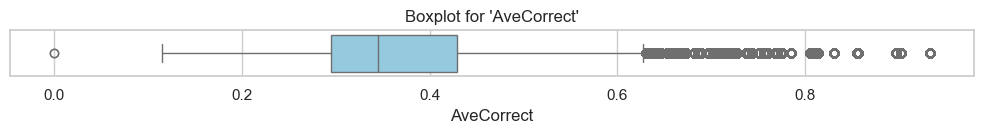

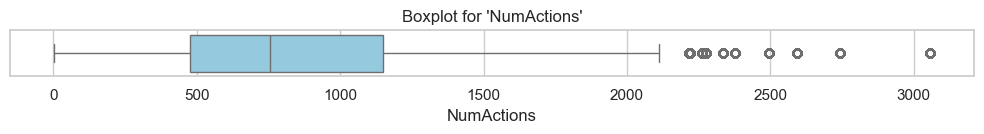

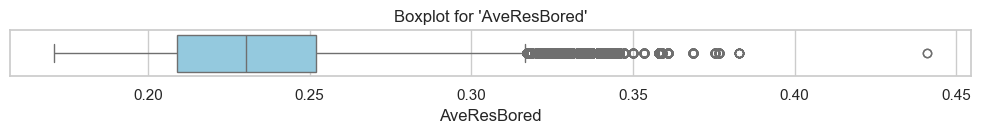

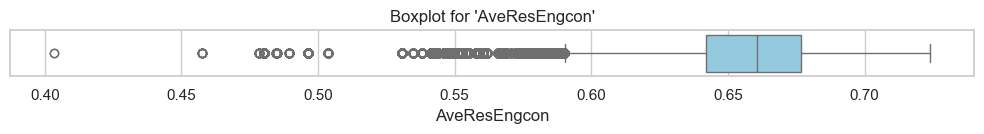

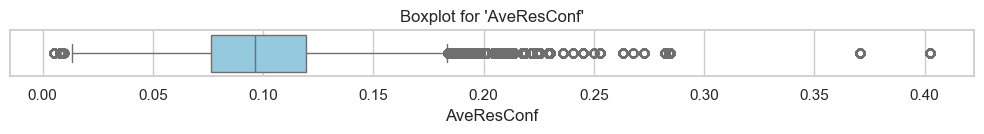

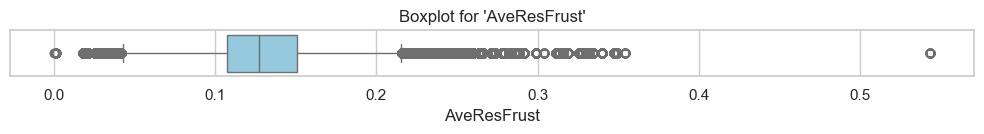

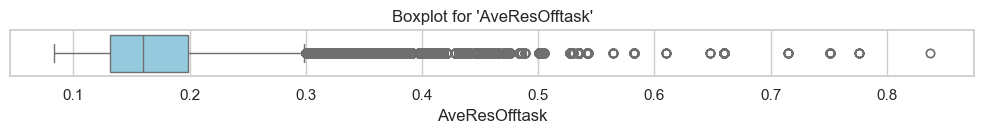

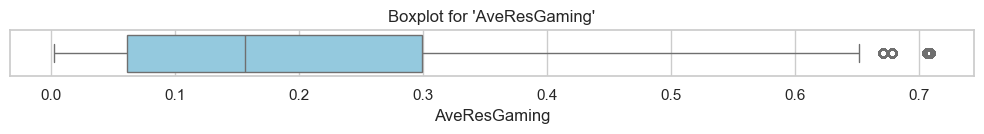

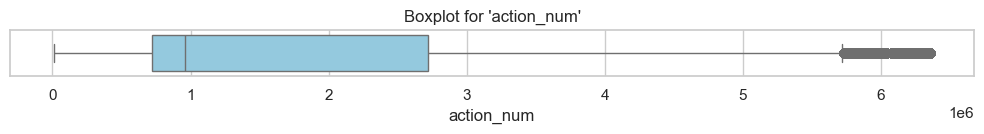

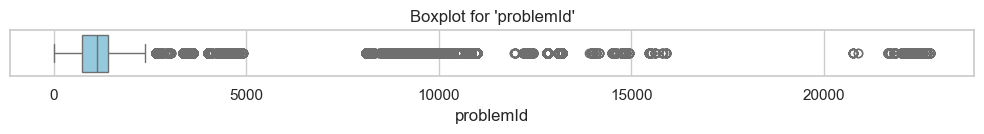

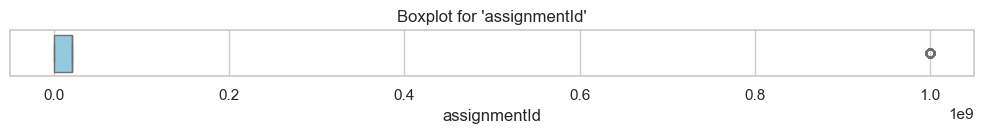

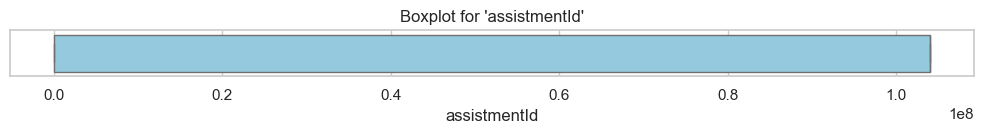

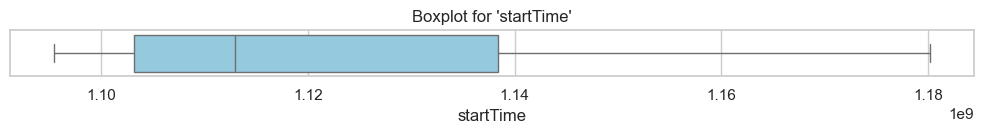

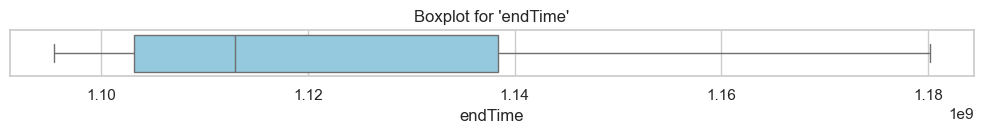

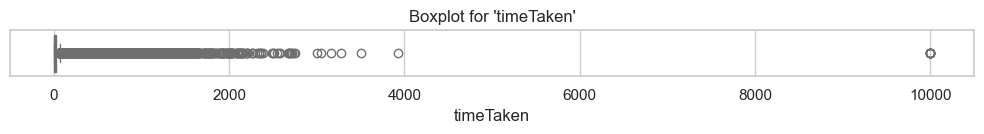

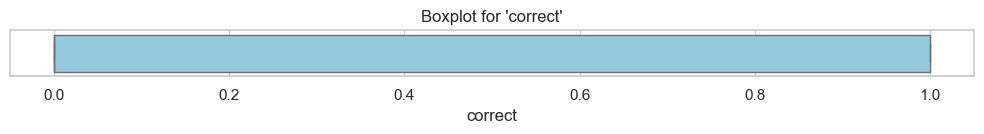

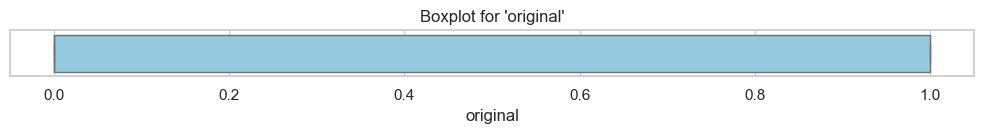

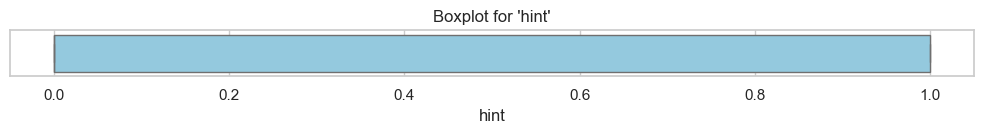

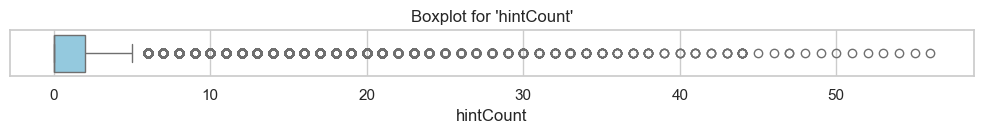

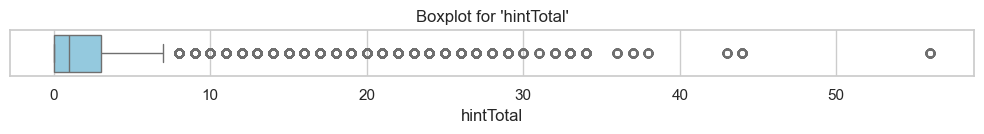

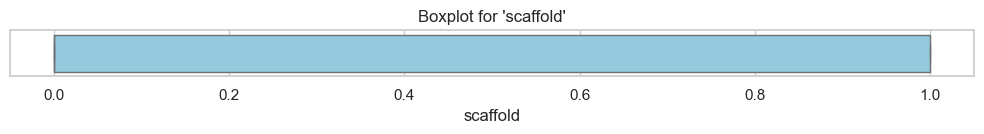

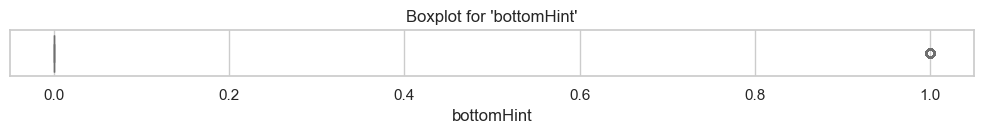

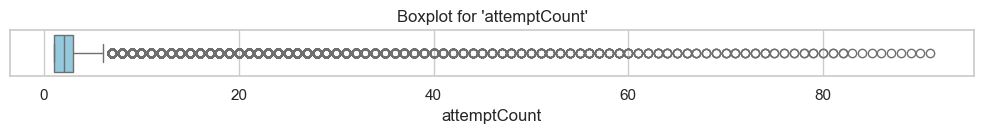

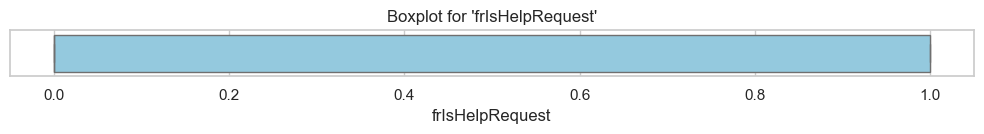

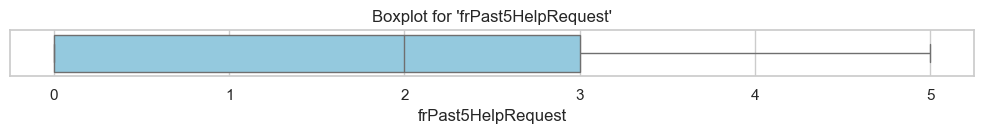

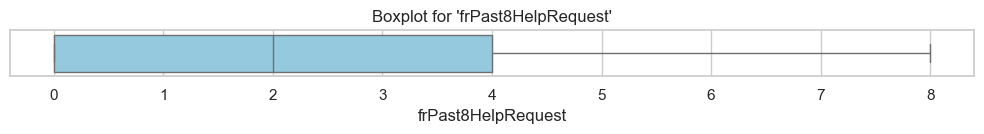

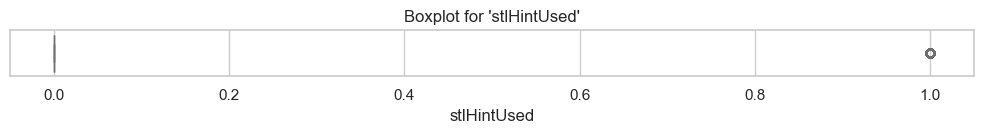

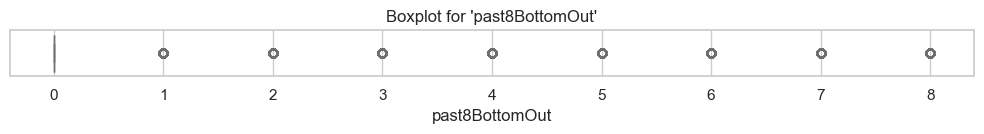

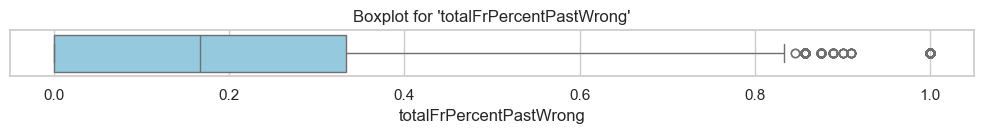

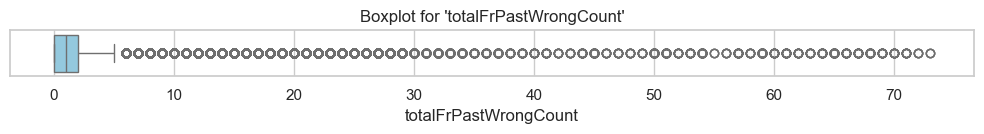

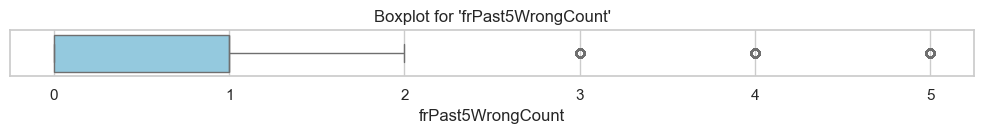

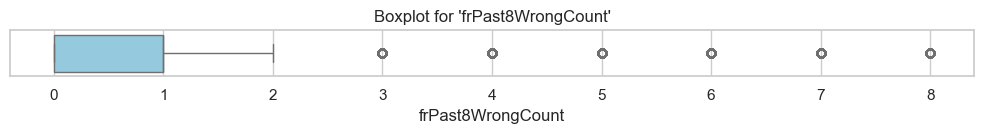

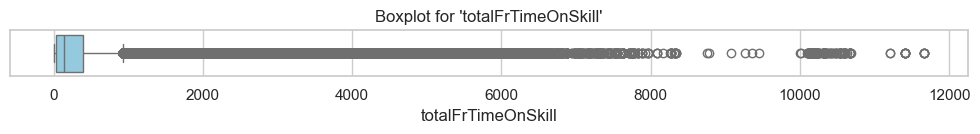

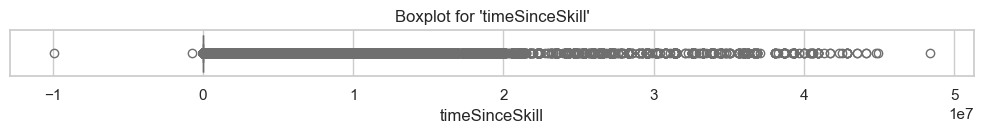

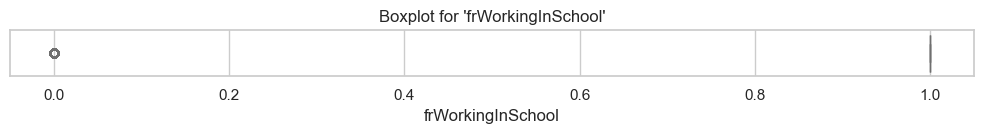

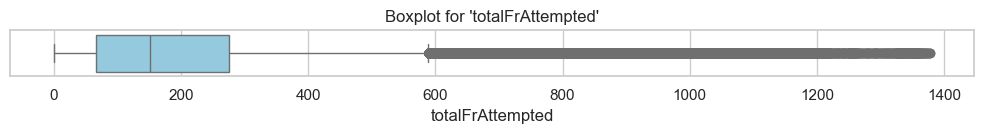

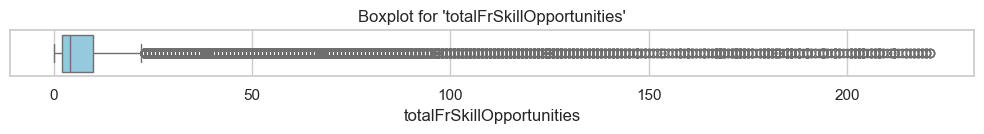

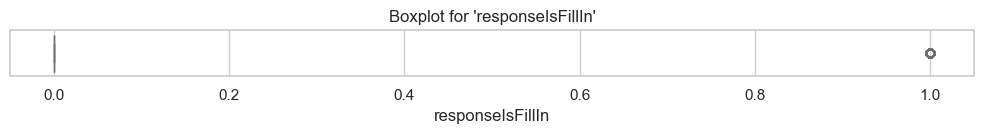

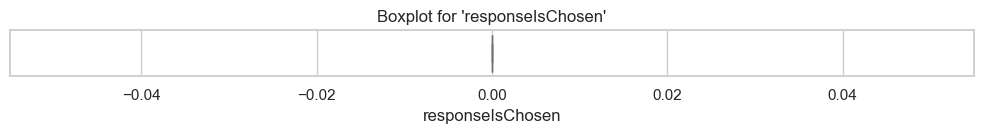

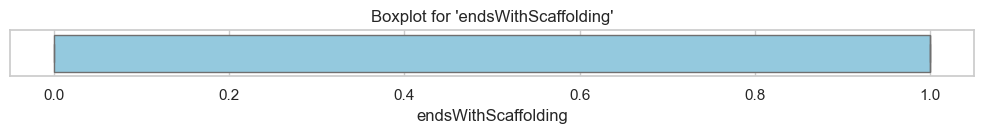

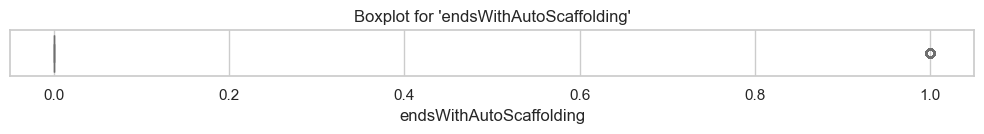

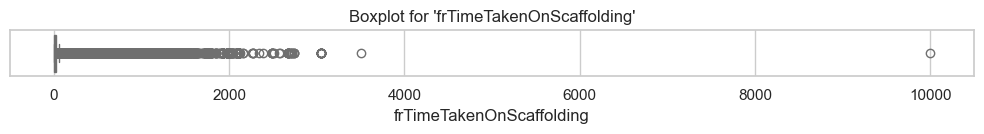

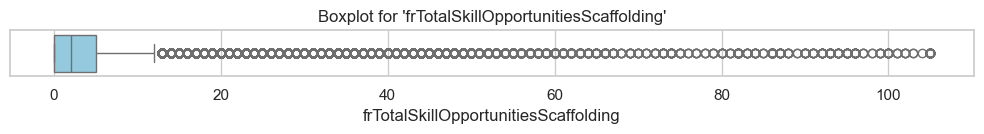

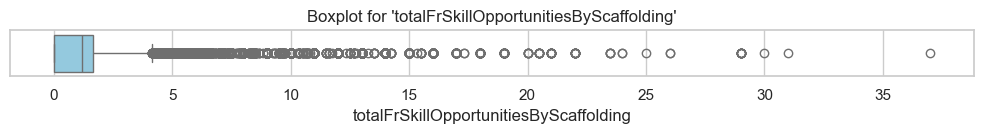

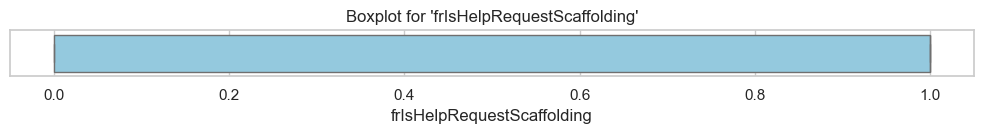

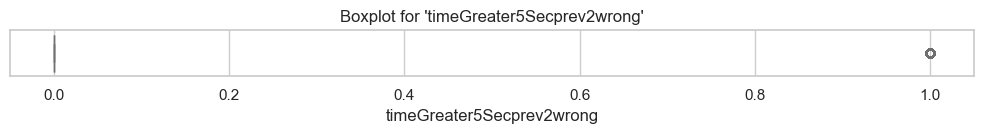

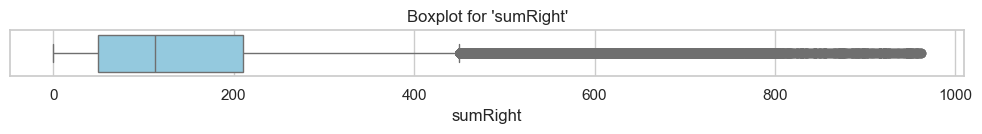

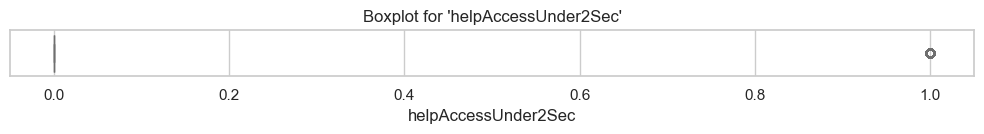

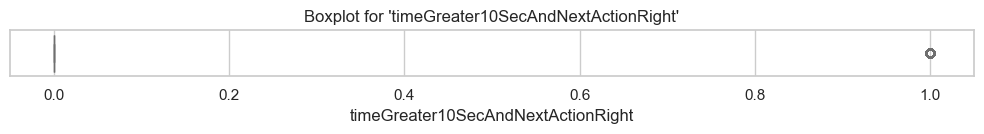

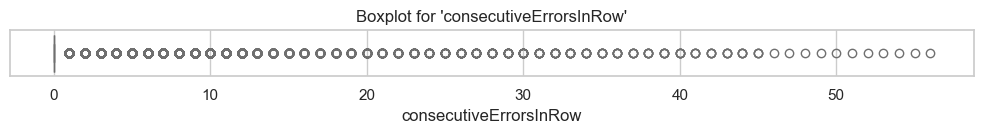

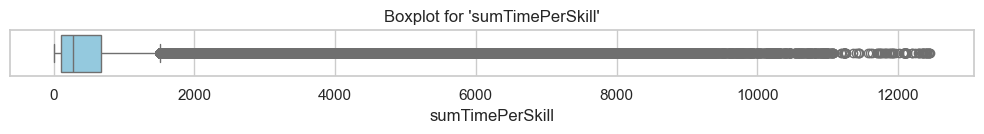

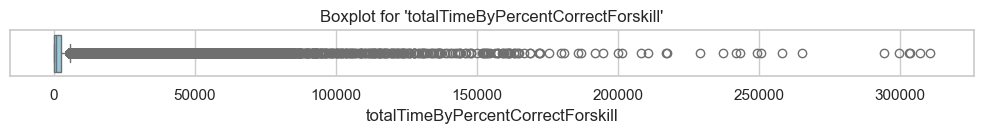

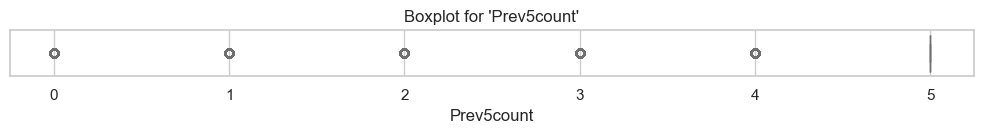

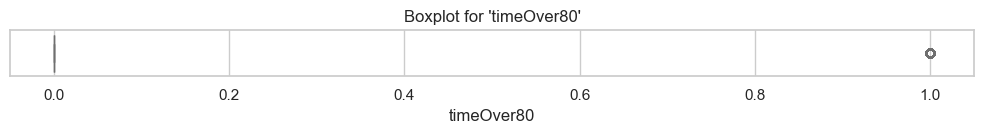

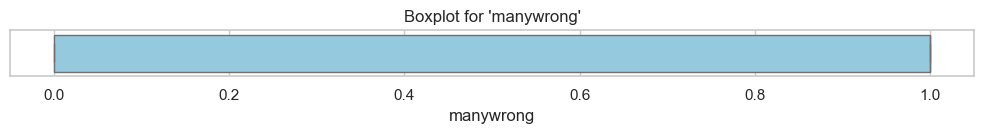

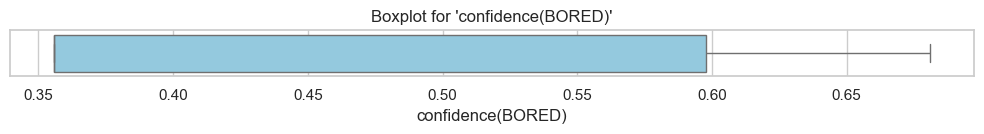

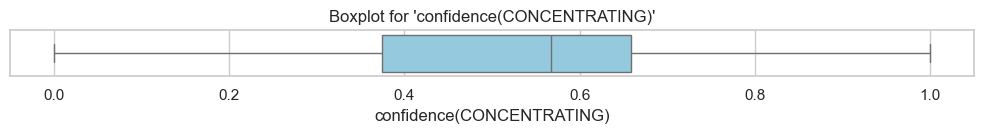

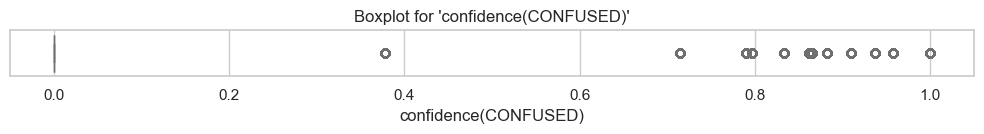

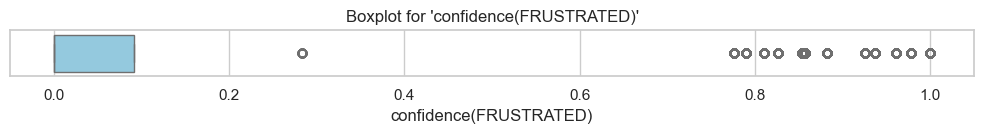

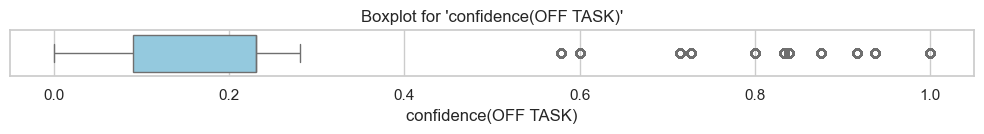

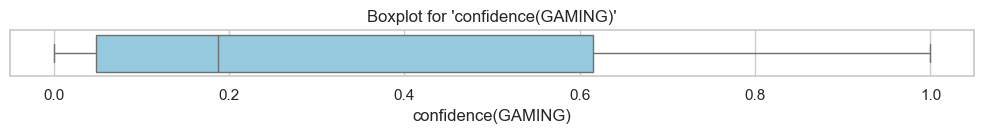

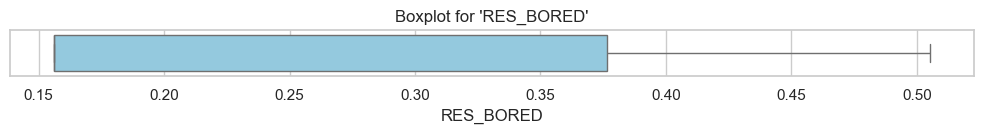

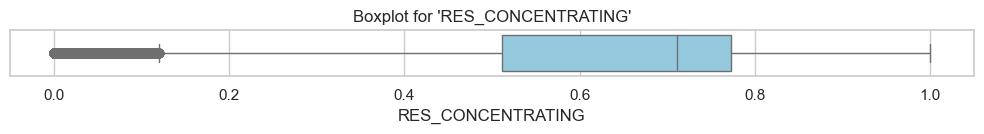

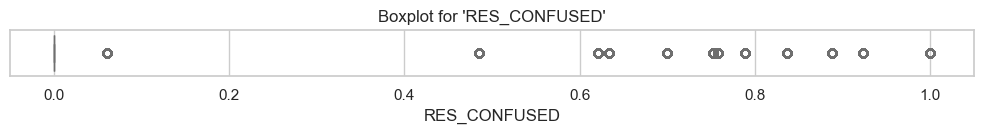

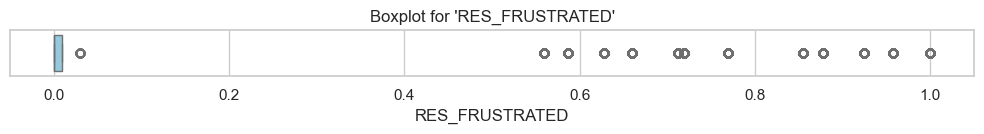

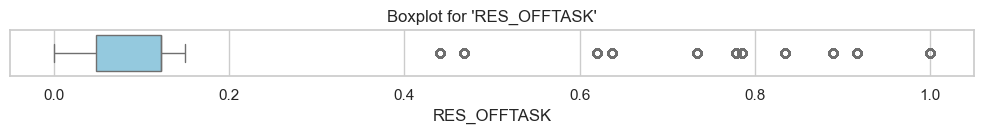

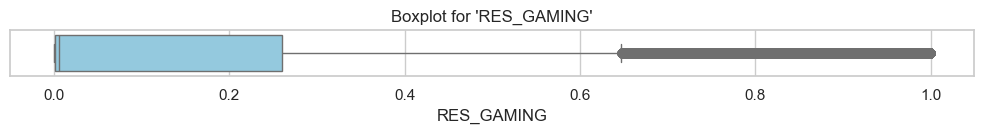

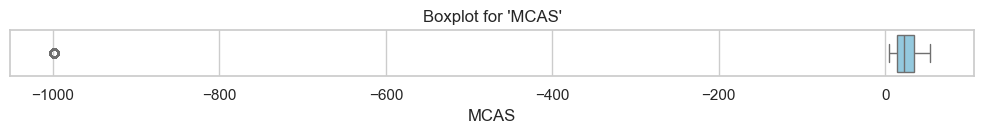

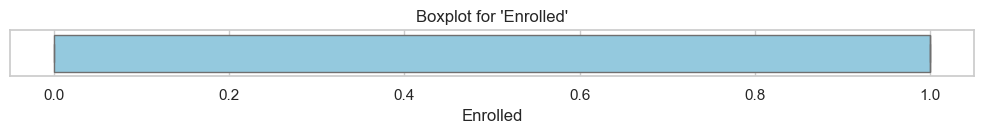

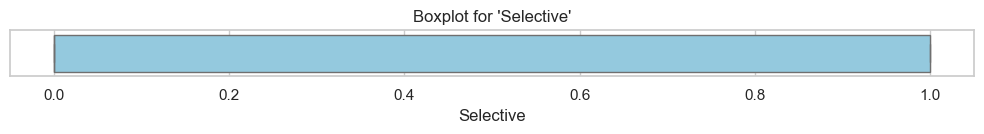

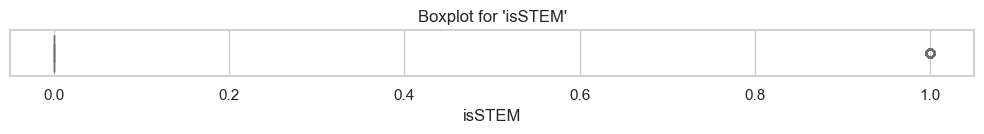

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Set style
sns.set(style="whitegrid")

# Plot boxplot for each numeric column
for col in numeric_cols.columns:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot for '{col}'")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### Check the correlation 

In [7]:
numeric_df = df.select_dtypes(include='number')
# Correlation with target column 'AveCorrect'
target_corr = numeric_df.corr()['AveCorrect'].sort_values(ascending=False)

print("📈 Correlation of features with AveCorrect:")
print(target_corr)


📈 Correlation of features with AveCorrect:
AveCorrect          1.000000
AveKnow             0.917330
AveCarelessness     0.840915
Selective           0.407233
AveResOfftask       0.396590
                      ...   
RES_GAMING         -0.296193
manywrong          -0.392822
NumActions         -0.405471
AveResGaming       -0.656703
responseIsChosen         NaN
Name: AveCorrect, Length: 75, dtype: float64


### Categorical columns

In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the result
print("📋 Categorical Columns:")
print(categorical_cols)


📋 Categorical Columns:
['SY ASSISTments Usage', 'skill', 'problemType', 'Ln-1', 'Ln']


In [9]:
df

,studentId,MiddleSchoolId,SY ASSISTments Usage,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,AveResConf,...,RES_CONFUSED,RES_FRUSTRATED,RES_OFFTASK,RES_GAMING,Ln-1,Ln,MCAS,Enrolled,Selective,isSTEM
0,8,2,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,...,0.000000,0.000000,0.785585,0.000264,0.13,0.06119,45,0,0,NaN
1,8,2,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,...,0.887452,0.000000,0.468252,0.001483,0.06119,0.21351,45,0,0,NaN
2,8,2,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,...,0.887452,0.000000,0.468252,0.001483,0.116,0.033306,45,0,0,NaN
3,8,2,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,...,0.000000,0.000000,0.108417,0.010665,0.116,0.033306,45,0,0,NaN
4,8,2,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,...,0.000000,0.000000,0.108417,0.010665,0.033306,0.118386,45,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942811,7783,1,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,0.123615,...,0.000000,0.000000,0.122595,0.000092,0.054517,0.053783,28,1,0,NaN
942812,7783,1,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,0.123615,...,0.633474,0.000000,0.122595,0.002815,0.053783,0.053673,28,1,0,NaN
942813,7783,1,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,0.123615,...,0.000000,0.000000,0.122595,0.101184,0.053783,0.053673,28,1,0,NaN
942814,7783,1,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,0.123615,...,0.000000,0.000000,0.122595,0.101184,0.053783,0.053673,28,1,0,NaN


### Converting the NaN values 

In [ ]:
# Convert 'Ln' and 'Ln-1' to numeric, force invalid ones to NaN
df['Ln'] = pd.to_numeric(df['Ln'], errors='coerce')
df['Ln-1'] = pd.to_numeric(df['Ln-1'], errors='coerce')

# Drop rows where either 'Ln' or 'Ln-1' is NaN (i.e., failed to convert)
df = df.dropna(subset=['Ln', 'Ln-1'])

# df['Ln'] = df['Ln'].astype(int)
# df['Ln-1'] = df['Ln-1'].astype(int)

# ✅ Done
print("✔ Cleaned and converted 'Ln' and 'Ln-1' successfully.")

✔ Cleaned and converted 'Ln' and 'Ln-1' successfully.


In [11]:
# # Extract start year as integer
# df['SY ASSISTments Usage'] = df['SY ASSISTments Usage'].str[:4].astype(int)

# Step 1: Convert to float
df['Ln'] = df['Ln'].astype(float)
df['Ln-1'] = df['Ln-1'].astype(float)

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_22096\4047219188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ln'] = df['Ln'].astype(float)
C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_22096\4047219188.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ln-1'] = df['Ln-1'].astype(float)


In [12]:
# Ensure column is string before slicing
df['SY ASSISTments Usage'] = df['SY ASSISTments Usage'].astype(str).str[:4].astype(int)


C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_22096\1409715712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SY ASSISTments Usage'] = df['SY ASSISTments Usage'].astype(str).str[:4].astype(int)


In [13]:
# Convert Ln and Ln-1 to integers
df['Ln'] = df['Ln'].astype(int)
df['Ln-1'] = df['Ln-1'].astype(int)


C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_22096\3309728869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ln'] = df['Ln'].astype(int)
C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_22096\3309728869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ln-1'] = df['Ln-1'].astype(int)


In [14]:
df.dtypes

studentId                 int64
MiddleSchoolId            int64
SY ASSISTments Usage      int32
AveKnow                 float64
AveCarelessness         float64
                         ...   
Ln                        int32
MCAS                      int64
Enrolled                  int64
Selective                 int64
isSTEM                  float64
Length: 80, dtype: object

### StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

# Select your features
features = ['AveCarelessness', 'AveResFrust', 'AveResOfftask',
            'SY ASSISTments Usage', 'Selective', 'Enrolled',
            'Ln', 'Ln-1', 'AveResBored', 'action_num']

# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Define features and target
features = ['AveCarelessness', 'AveResFrust', 'AveResOfftask', 
            'SY ASSISTments Usage', 'Selective', 'Enrolled', 
            'Ln', 'Ln-1', 'AveResBored', 'action_num']
X = df[features]
y = df["AveCorrect"] * 100  # 🎯 Target in 0–100 scale

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Xgboost model

In [68]:
from xgboost import XGBRegressor
model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate
y_pred = model_xg.predict(X_test)
print("✅ Model Performance")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


✅ Model Performance
MSE: 0.5043059981068347
R²: 0.9956219604671424


### Linear Regression

In [53]:
# 7. Initialize and Train Model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# Evaluate
y_pred = model_lr.predict(X_test)
print("✅ Model Performance")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


✅ Model Performance
MSE: 21.04012940658779
R²: 0.8173439961763695


### Ridge Regressio 

In [55]:
from sklearn.linear_model import Ridge
# Initialize and train Ridge Regression model
model_ridge = Ridge(alpha=1.0)  # You can adjust alpha for regular
#ization
model_ridge.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.7327e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [56]:
# Evaluate
y_pred = model_ridge.predict(X_test)
print("✅ Model Performance")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


✅ Model Performance
MSE: 21.040038079443473
R²: 0.8173447890161329


### Lasso Regressio 

In [58]:
from sklearn.linear_model import Lasso
# Initialize and train Lasso Regression model
model_lasso = Lasso(alpha=1.0)  # You can adjust alpha for
# regularization
model_lasso.fit(X_train, y_train)

Lasso()

In [59]:
# Evaluate
y_pred = model_lasso.predict(X_test)
print("✅ Model Performance")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


✅ Model Performance
MSE: 97.53789705516917
R²: 0.15324273186838888


### Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train Decision Tree Regression model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
# Evaluate
y_pred = model_dt.predict(X_test)
print("✅ Model Performance")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


✅ Model Performance
MSE: 3.380368000481032e-06
R²: 0.9999999706539585


### Random Forest Regression 

In [63]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train Random Forest Regression model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# Evaluate
y_pred = model_rf.predict(X_test)
print("✅ Model Performance")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


✅ Model Performance
MSE: 0.0011583030124264952
R²: 0.9999899444059788


### Save the model 

In [69]:
# save the xgboost model
import joblib
joblib.dump(model_xg, 'xgboost_model.pkl')
print("✅ Model saved as 'xgboost_model.pkl'")  


✅ Model saved as 'xgboost_model.pkl'
